In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("IRIS.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


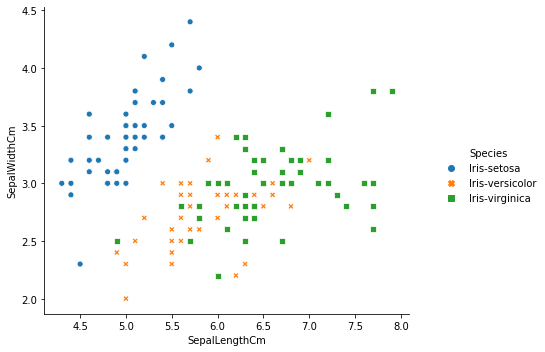

In [7]:
%matplotlib inline
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species',style='Species')
g.fig.set_size_inches(8,5)

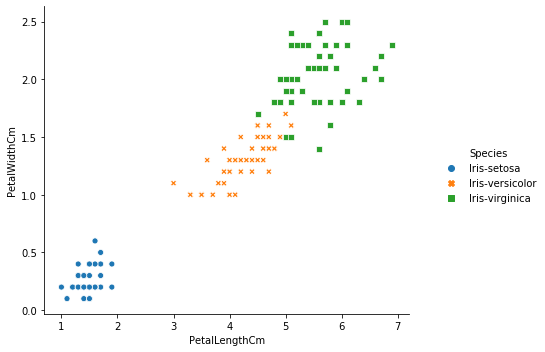

In [8]:
g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species',style='Species')
g.fig.set_size_inches(8,5)
plt.show()

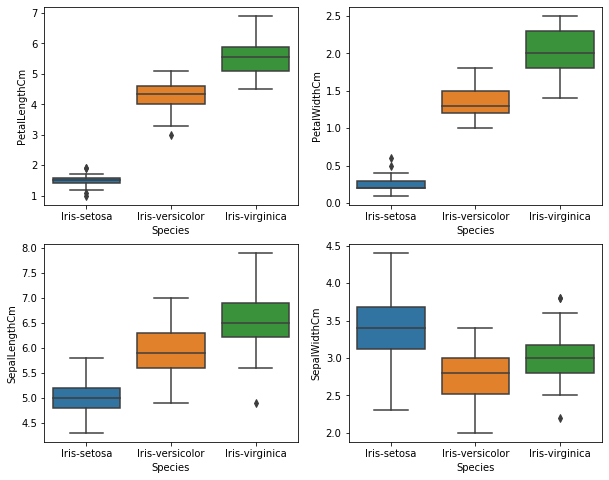

In [9]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
plt.show()

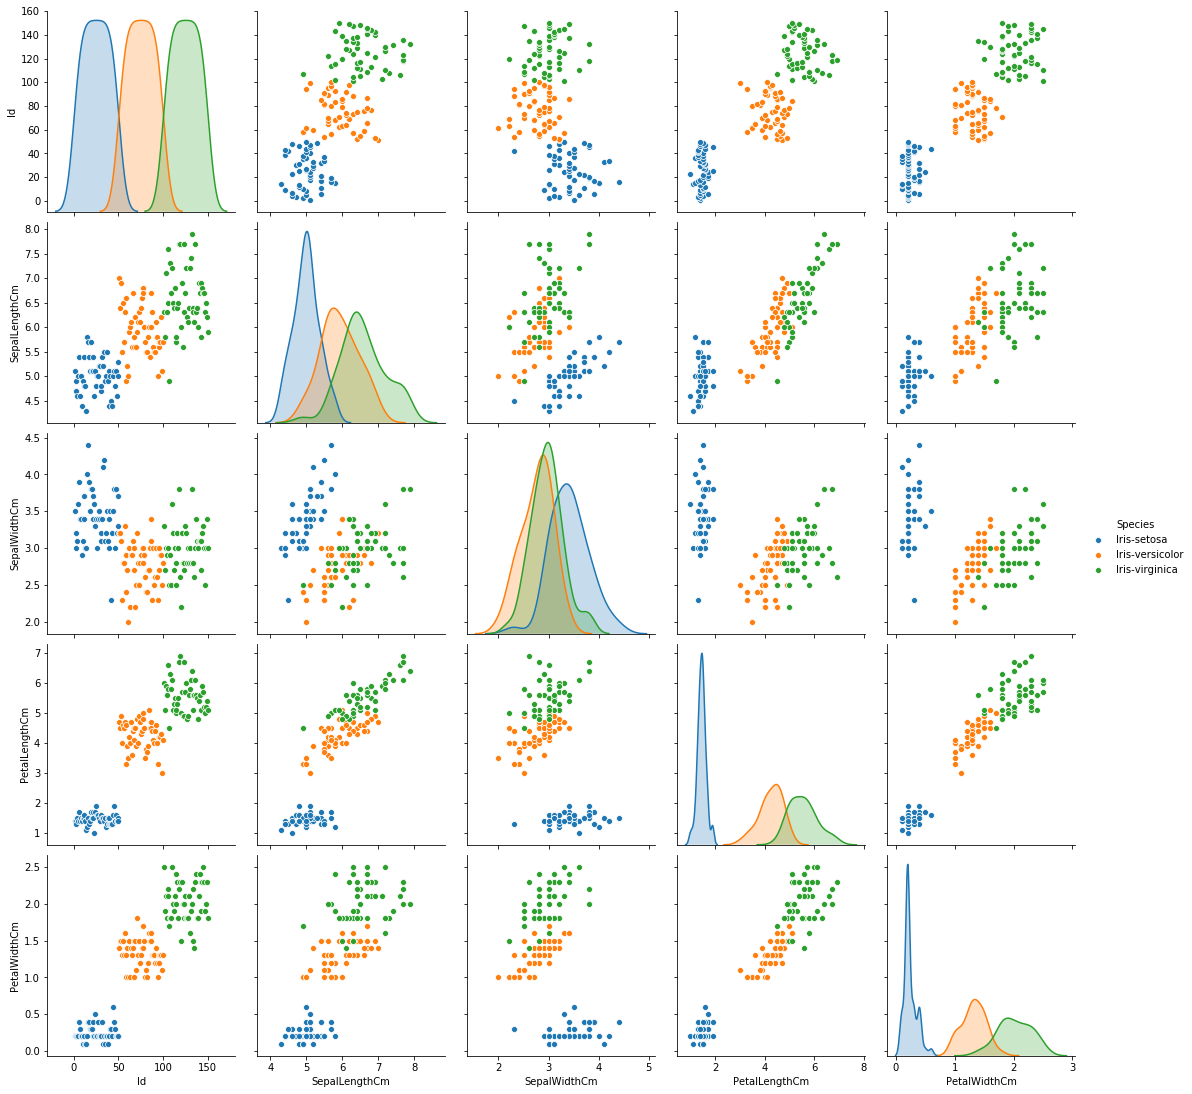

In [11]:
sns.pairplot(df, hue="Species", size=3)

In [12]:
X = df.drop(['Id','Species'],axis='columns')
Y = df.Species

In [13]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [17]:
acc=[]
model=[]

In [64]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(Y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

accuracy = accuracy_score(Y_test,Y_pred)
precision =precision_score(Y_test, Y_pred,average='micro')
recall =  recall_score(Y_test, Y_pred,average='micro')
f1 = f1_score(Y_test,Y_pred,average='micro')
model.append('Support Vector Machine')
print("Support Vector Machine's Accuracy is: ",x)

print(classification_report(Y_test,Y_pred))

Support Vector Machine's Accuracy is:  0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [63]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(Y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

accuracy = accuracy_score(Y_test,Y_pred)
precision =precision_score(Y_test, Y_pred,average='micro')
recall =  recall_score(Y_test, Y_pred,average='micro')
f1 = f1_score(Y_test,Y_pred,average='micro')
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", accuracy)

print(classification_report(Y_test,Y_pred))

DecisionTrees's Accuracy is:  1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(Y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
accuracy = accuracy_score(Y_test,Y_pred)
precision =precision_score(Y_test, Y_pred,average='micro')
recall =  recall_score(Y_test, Y_pred,average='micro')
f1 = f1_score(Y_test,Y_pred,average='micro')
model.append('K-Nearest Neighbour')
print("K-nearest neighbour's accuracy is: ",x)

print(classification_report(Y_test,Y_pred))

K-nearest neighbour's accuracy is:  0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [57]:
results = pd.DataFrame({
    'Model': [ 'KNN',   
              ' Support Vector Machine', 
              'Decision Tree'],
    'Score': [ acc_knn,  
              acc_linear_svc,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_svc,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Support Vector Machine,95.83,100.00
1,Decision Tree,100.00,100.00
2,KNN,95.00,96.67


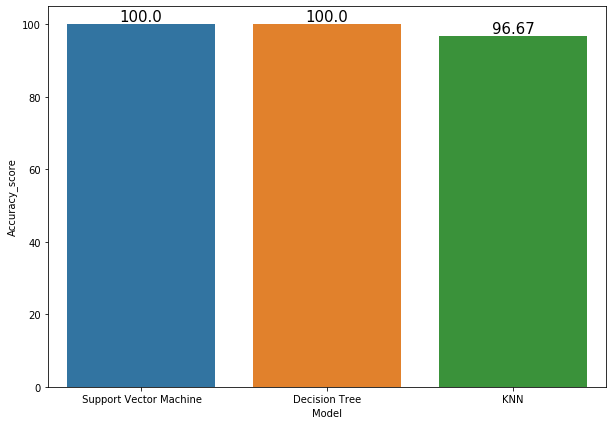

In [70]:
plt.subplots(figsize=(10,7))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

In [61]:
decision_tree.predict([[7.9,4.0,6.2,3.3]])

array(['Iris-virginica'], dtype=object)

In [62]:
linear_svc.predict([[7.7,5.2,2.3,1.2]])

array(['Iris-setosa'], dtype=object)

In [67]:
knn.predict([[7.6,6.2,3.4,6.5]])

array(['Iris-virginica'], dtype=object)

#### BY ABOVE ONSERVATIONS WE CAN IDENTIFY THAT DECISION TREE, SUPPORT VECTOR MACHINE AND K-NEAREST NEIGHBOUR ALGORITHMS GAVE SAME ACCURACY:100%

### PROJECT COMPLETED BY
### KOMPALLI. UMA PRANAVI